#### Importing different libraries such as numpy, pandas, matplotlib and seaborn.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing data from d-drive

In [5]:
claims = pd.read_excel('d:/Data/claims.xlsx')
cust = pd.read_excel('d:/Data/cust_demographics.xlsx')

#### Q: Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create      a 360-degree view of the data. Use the same for the subsequent questions.     

In [6]:
claims.head(1)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No


In [8]:
cust.head(1)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum


In [10]:
cust_claims = claims.merge(cust, left_on = 'customer_id', right_on = 'CUST_ID', how = 'outer')

In [15]:
cust_claims.head(1)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum


#### Q: Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns               and their business significance.

In [13]:
cust_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1107 entries, 0 to 1106
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1100 non-null   float64       
 1   customer_id          1100 non-null   float64       
 2   incident_cause       1100 non-null   object        
 3   claim_date           1100 non-null   datetime64[ns]
 4   claim_area           1100 non-null   object        
 5   police_report        1100 non-null   object        
 6   claim_type           1100 non-null   object        
 7   claim_amount         1035 non-null   float64       
 8   total_policy_claims  1090 non-null   float64       
 9   fraudulent           1100 non-null   object        
 10  CUST_ID              1092 non-null   float64       
 11  gender               1092 non-null   object        
 12  DateOfBirth          1092 non-null   datetime64[ns]
 13  State                1092 non-nul

#### Q: Check the missing values and impute the missing values with an appropriate value. (mean for ccontinuous and mode for categorical).

In [27]:
cust_claims.head(1)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,69348631.0,154557.0,Driver error,2018-04-10,Auto,No,Injury only,NaN,1.0,Yes,Female,1978-05-23,DE,962-879-1238,Platinum


In [28]:
cust_claims['incident_cause'].isna().sum()

7

In [34]:
con_col = cust_claims.select_dtypes('number').columns
cat_col = cust_claims.select_dtypes('object').columns

In [36]:
for col in cat_col:
    cust_claims[col] = cust_claims[col].fillna(cust_claims[col].mode()[0])
    cust_claims[con_col] = cust_claims[con_col].fillna(cust_claims[con_col].mean())

In [37]:
cust_claims.head(1)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,69348631.0,154557.0,Driver error,2018-04-10,Auto,No,Injury only,12470.498519,1.0,Yes,Female,1978-05-23,DE,962-879-1238,Platinum


In [41]:
cust_claims['State'].isna().sum()

0

#### Q: Create a new column by the name 'Age'.

In [45]:
cust_claims['Age'] = round((cust_claims.claim_date - cust_claims.DateOfBirth).apply(lambda x : x.days)/365.25)

In [46]:
cust_claims.head(1)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Age
0,69348631.0,154557.0,Driver error,2018-04-10,Auto,No,Injury only,12470.498519,1.0,Yes,Female,1978-05-23,DE,962-879-1238,Platinum,40.0


#### Q: What is the average amount claimed by the customers from various segments?

In [49]:
cust_claims.groupby('Segment')['claim_amount'].mean()

Segment
Gold        12755.710930
Platinum    12370.138663
Silver      12271.163192
Name: claim_amount, dtype: float64

#### Q: What is the total claim amount by the customers from various segments?

In [51]:
cust_claims.loc[cust_claims.claim_date < '2018-09-10',:].groupby('incident_cause')['claim_amount'].sum()

incident_cause
Crime                 7.244625e+05
Driver error          3.264286e+06
Natural causes        1.312706e+06
Other causes          3.725038e+06
Other driver error    3.318806e+06
Name: claim_amount, dtype: float64

#### Q: Draw a pie chart between the aggregated value of claim amount based on gender and segment. 

In [67]:
rep = cust_claims.groupby(['gender','Segment'])['claim_amount'].sum().reset_index()
rep

,gender,Segment,claim_amount
0,Female,Gold,2.122234e+06
1,Female,Platinum,2.381974e+06
2,Female,Silver,1.935970e+06
3,Male,Gold,2.622890e+06
4,Male,Platinum,2.120756e+06
5,Male,Silver,2.346666e+06


In [71]:
ae = rep.pivot(index = 'Segment', columns = 'gender', values = 'claim_amount')
ae

gender,Female,Male
Segment,,
Gold,2.122234e+06,2.622890e+06
Platinum,2.381974e+06,2.120756e+06
Silver,1.935970e+06,2.346666e+06


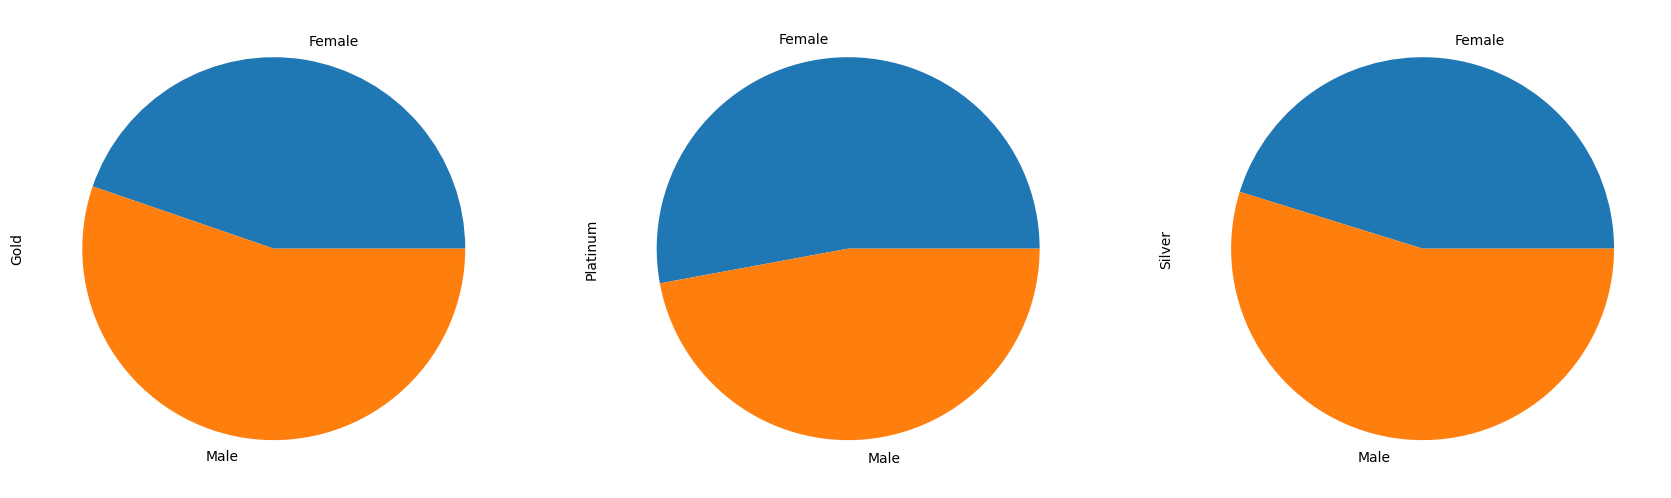

In [74]:
ae.T.plot(kind = 'pie', subplots = True, legend = False, figsize = (21,8))
plt.show()

#### Q: Among males and females, wich gender had claimed the most for any type of driver related issues? 

In [80]:
a1 = cust_claims.loc[(cust_claims.incident_cause.str.lower().str.contains('driver'))].groupby('gender')[['gender']].count()
a1

,gender
gender,
Female,221
Male,280


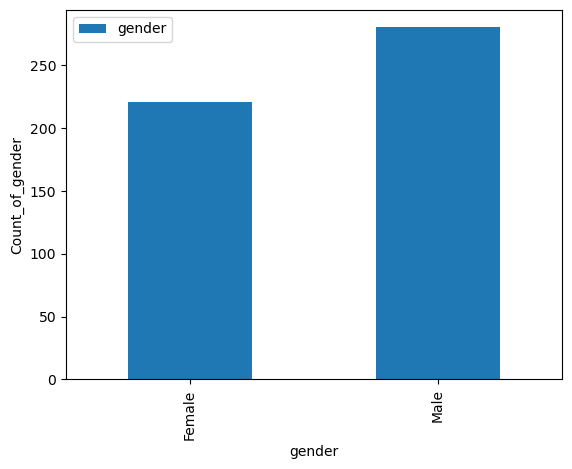

In [83]:
a1.plot(kind = 'bar')
plt.ylabel('Count_of_gender');

#### Q: Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart?

In [85]:
cust_claims.head(1)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Age
0,69348631.0,154557.0,Driver error,2018-04-10,Auto,No,Injury only,12470.498519,1.0,Yes,Female,1978-05-23,DE,962-879-1238,Platinum,40.0


In [97]:
a2 = cust_claims.groupby('Age')['fraudulent'].count()

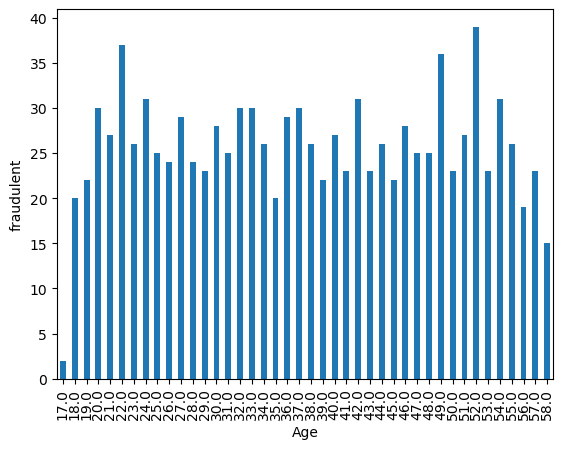

In [99]:
a2.plot(kind = 'bar')
plt.ylabel('fraudulent');

In [100]:
cust_claims.head(1)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Age,Age_group
0,69348631.0,154557.0,Driver error,2018-04-10,Auto,No,Injury only,12470.498519,1.0,Yes,Female,1978-05-23,DE,962-879-1238,Platinum,40.0,NaN


#### Q: Which age group had the maximum fraudulent policy claims? Visualize it in a bar chart.

In [105]:
a3 = cust_claims.groupby(['gender','claim_area'])['claim_amount'].sum()

<AxesSubplot:xlabel='gender,claim_area'>

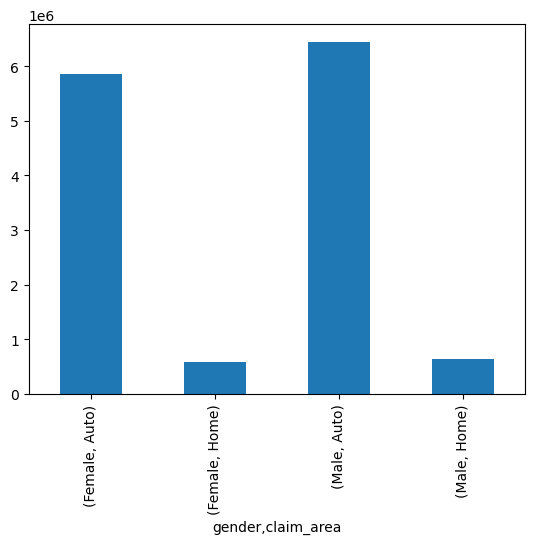

In [106]:
a3.plot(kind = 'bar')